In [85]:
!unzip dataset.zip

Archive:  dataset.zip
replace aug_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: aug_test.csv            
  inflating: aug_train.csv           
  inflating: sample_submission.csv   


In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1 Introduction
In this notebook, we will explore a dataset compiled to understand which factors lead a person to leave their current job as a data scientist. Using this data, we’ll conduct an exploratory data analysis (EDA) to find patterns.

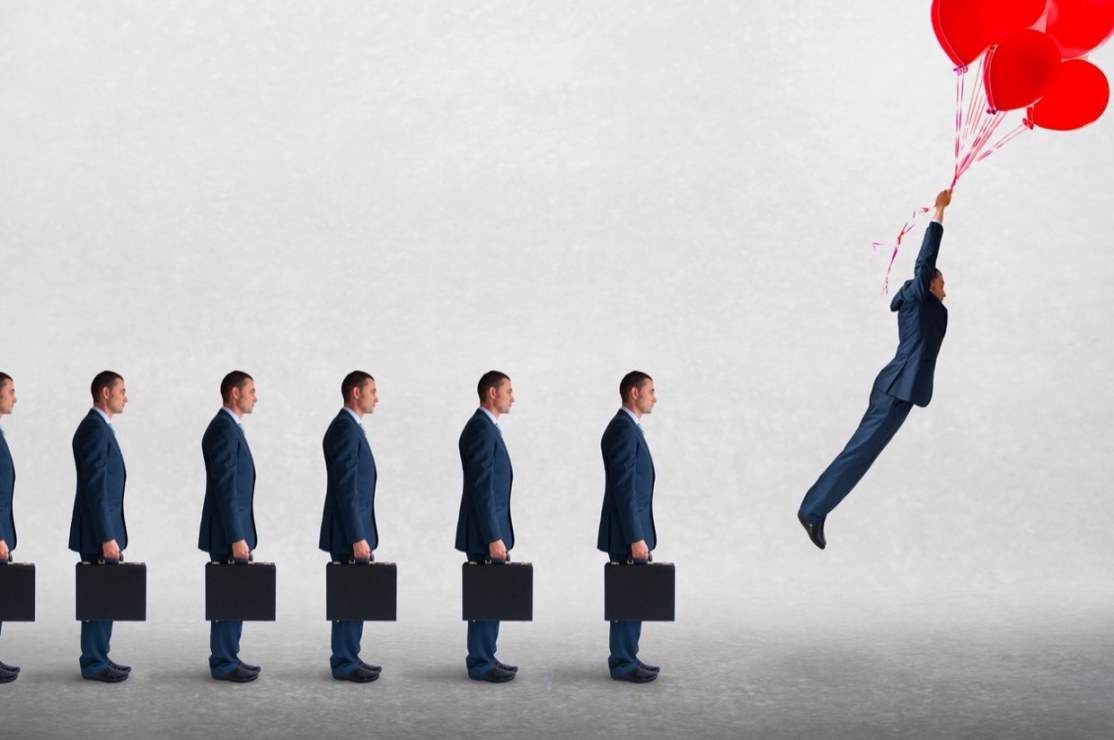

In [87]:
pd.read_csv('aug_train.csv').head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


## 1.1 Variables used for the analysis

In [88]:
vs = []
ds = []
vs.append('Variables')
ds.append('Description')

vs.append('enrollee_id')
ds.append('Unique ID for candidate')

vs.append('city')
ds.append('City code')

vs.append('city_development_index')
ds.append('Development index of the city (scaled)')

vs.append('gender')
ds.append('Gender of candidate')

vs.append('relevent_experience')
ds.append('Relevant experience of candidate')

vs.append('enrolled_university')
ds.append('Type of University course enrolled if any')

vs.append('education_level')
ds.append('Education level of candidate')

vs.append('major_discipline')
ds.append('Education major discipline of candidate')

vs.append('experience')
ds.append('Candidate total experience in years')

vs.append('company_size')
ds.append('No of employees in current employer’s company')

vs.append('company_type')
ds.append('Type of current employer')

vs.append('last_new_job')
ds.append('Difference in years between previous job and current job')

vs.append('training_hours')
ds.append('training hours completed')

vs.append('target')
ds.append('0: Not looking for job change, 1: Looking for a job change')

pd.DataFrame({vs[0]:vs[1:],ds[0]:ds[1:]}).style.set_properties(**{'text-align': 'right'})

,Variables,Description
0,enrollee_id,Unique ID for candidate
1,city,City code
2,city_development_index,Development index of the city (scaled)
3,gender,Gender of candidate
4,relevent_experience,Relevant experience of candidate
5,enrolled_university,Type of University course enrolled if any
6,education_level,Education level of candidate
7,major_discipline,Education major discipline of candidate
8,experience,Candidate total experience in years
9,company_size,No of employees in current employer’s company


# 2 Exploratory Data Analysis(EDA)

number of nans in features

In [89]:
df = pd.read_csv('aug_train.csv')
df.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

type of features

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

distribution of target

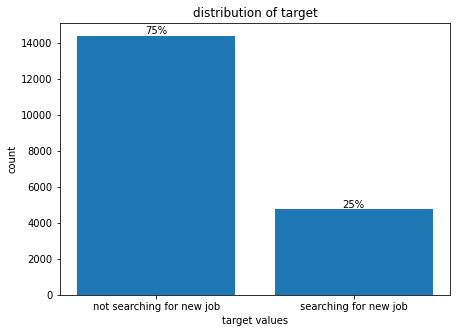

In [91]:
bars = df['target'].value_counts()
plt.figure(figsize=(7,5))
graph = plt.bar(['not searching for new job', 'searching for new job'], bars.values)
plt.title('distribution of target')
plt.xlabel('target values')
plt.ylabel('count')


i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
     
    plt.text(x+width/2,
             y+height*1.01+1,
             str(round(100*bars[i]/df['target'].count()))+'%',
             ha='center')
    i += 1

We have main keys points to note in this dataset:

1.   Most of the data is categorical
2.   There is an imbalance in the classes
3.   There are lots of missing values




cities' number in dataset is  123


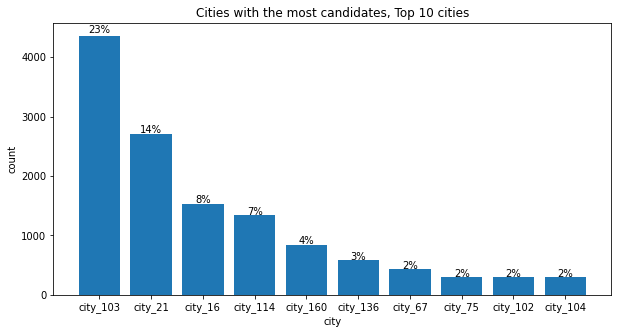

In [92]:
df = pd.read_csv('aug_train.csv')
res = df.groupby('city').count().sort_values('enrollee_id', ascending=False).head(10)['enrollee_id']

print("cities' number in dataset is ", len(df.groupby('city').count().reset_index()['city']))

plt.figure(figsize=(10,5))
graph = plt.bar([str(i) for i in res.keys()], res.values)
plt.title('Cities with the most candidates, Top 10 cities')
plt.xlabel('city')
plt.ylabel('count')


i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
     
    plt.text(x+width/2,
             y+height*1.01+1,
             str(round(100*res.values[i]/df['target'].count()))+'%',
             ha='center')
    i += 1

Out of the 123 cities, we can see that the top 4 cities represent over half of the candidates, with city_103 accounting for almost a quarter.

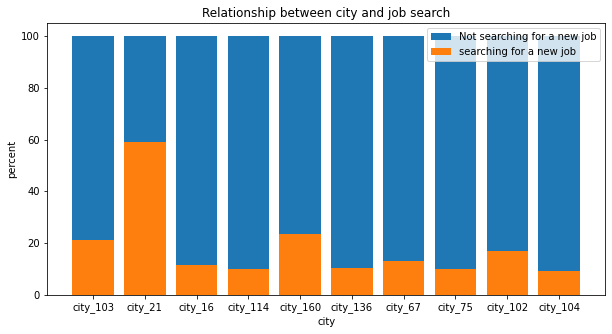

In [93]:
res2 = df.groupby(['city','target']).count().loc[res.keys(),:]

res20 = res2.loc[:,0,:]['enrollee_id']
res21 = res2.loc[:,1,:]['enrollee_id']

f_name = [res21[i] for i in res21.keys()]

plt.figure(figsize=(10,5))
plt.bar([str(i) for i in res21.keys()], [100 for i in res21.keys()], label='Not searching for a new job')
plt.bar([str(i) for i in res21.keys()], [100*res21[i]/(res21[i]+res20[i]) for i in res21.keys()], label='searching for a new job')
plt.title('Relationship between city and job search')
plt.xlabel('city')
plt.ylabel('percent')
plt.legend();

In the top 10 cities with the most candidates, the proportion of candidates searching for a new job is lower, with the exception of city_21.

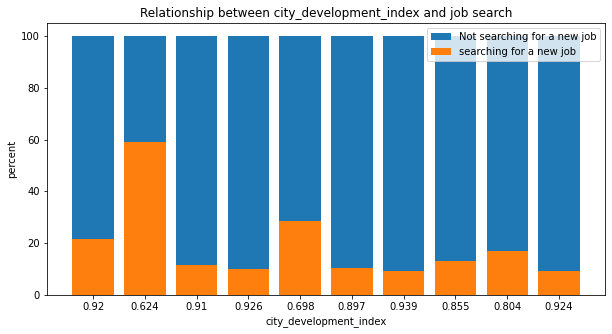

In [94]:
df = pd.read_csv('aug_train.csv')
res = df.groupby('city_development_index').count().sort_values('enrollee_id', ascending=False).head(10)['enrollee_id']

res2 = df.groupby(['city_development_index','target']).count().loc[res.keys(),:]

res20 = res2.loc[:,0,:]['enrollee_id']
res21 = res2.loc[:,1,:]['enrollee_id']
f_index = [res21[i] for i in res21.keys()]

plt.figure(figsize=(10,5))
plt.bar([str(i) for i in res21.keys()], [100 for i in res21.keys()], label='Not searching for a new job')
plt.bar([str(i) for i in res21.keys()], [100*res21[i]/(res21[i]+res20[i]) for i in res21.keys()], label='searching for a new job')
plt.title('Relationship between city_development_index and job search')
plt.xlabel('city_development_index')
plt.ylabel('percent')
plt.legend();

We can see that this graph is very similar to the previous one. This means that the variables city development index and city have a strong correlation. Let’s check this hypothesis with the Chi-square test of independence.

In [95]:
from scipy.stats import chisquare

chisquare(f_name, f_exp=f_index)

Power_divergenceResult(statistic=49.75737047042271, pvalue=1.1965115277166667e-07)

As the p-value is very small, we can reject the independence of the variables, meaning they have a very strong relationship. For this reason, we’ll remove the city variable for the predictive model.

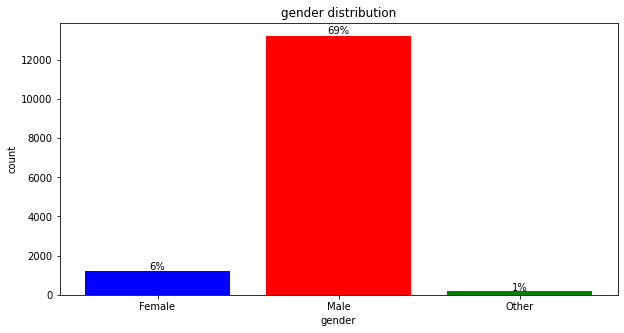

In [96]:
df = pd.read_csv('aug_train.csv')
res = df.groupby('gender').count()['enrollee_id']

plt.figure(figsize=(10,5))
graph = plt.bar([str(i) for i in res.keys()], res.values, color=['blue', 'red', 'green'])
plt.title('gender distribution')
plt.xlabel('gender')
plt.ylabel('count')


i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
     
    plt.text(x+width/2,
             y+height*1.01+1,
             str(round(100*res.values[i]/df['target'].count()))+'%',
             ha='center')
    i += 1

- sum of bars percent is less than 100. it means a significant number of participants didn’t share their gender.

- In this sample, males make up a majority of participants.

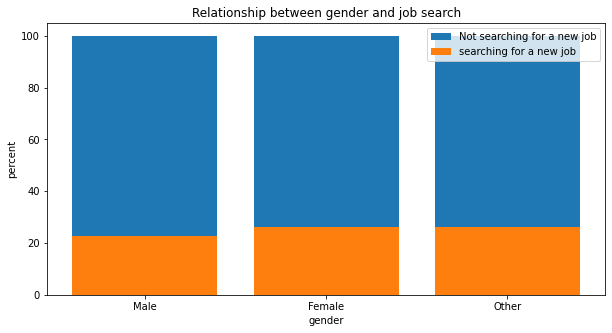

In [97]:
df = pd.read_csv('aug_train.csv')
res = df.groupby('gender').count().sort_values('enrollee_id', ascending=False)['enrollee_id']

res2 = df.groupby(['gender','target']).count().loc[res.keys(),:]

res20 = res2.loc[:,0,:]['enrollee_id']
res21 = res2.loc[:,1,:]['enrollee_id']
f_index = [res21[i] for i in res21.keys()]

plt.figure(figsize=(10,5))
plt.bar([str(i) for i in res21.keys()], [100 for i in res21.keys()], label='Not searching for a new job')
plt.bar([str(i) for i in res21.keys()], [100*res21[i]/(res21[i]+res20[i]) for i in res21.keys()], label='searching for a new job')
plt.title('Relationship between gender and job search')
plt.xlabel('gender')
plt.ylabel('percent')
plt.legend();

The percentage of people looking for a new job is almost the same for all genders. The distribution of job seekers in different categories of gender seems to be the same. If the distribution of job seekers is the same in all categories, it indicates that the two variables are independent of each other. Gender has no effect on changing the proportion of job seekers. We use the independence test to prove it.

In order to compute the Chi-square test statistic, we would need to construct a contingency table.
We can do that using the ‘crosstab’ function from pandas:

In [98]:
ct = pd.crosstab(df.target, df.gender)
ct

gender,Female,Male,Other
target,,,
0.0,912,10209,141
1.0,326,3012,50


The numbers in this table represent frequencies. There is a shortcut to perform this test in Python, which leverages the SciPy library

In [99]:
from scipy.stats import chi2_contingency

obs = np.array([ct.iloc[0][:].values,
                  ct.iloc[1][:].values])
print('x^2:',chi2_contingency(obs)[0],'p_val:',chi2_contingency(obs)[1],'df:',chi2_contingency(obs)[2])

x^2: 9.0421817403733 p_val: 0.010877151633874342 df: 2


The value of p_value is less than alpha, ie 0.05. This means that the null hypothesis is rejected and two variables are dependent. That is, knowing the gender of the candidate give us information about whether the person will be looking for a new job. The p_value value is not too far from alpha. That is, the relationship between the two variables was not very strong. The relationship between the two is close to being independent rather than a very strong connection.

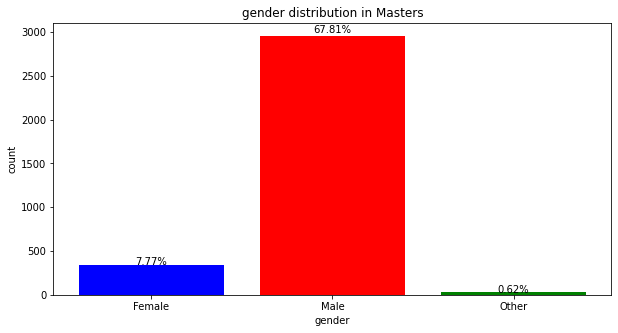

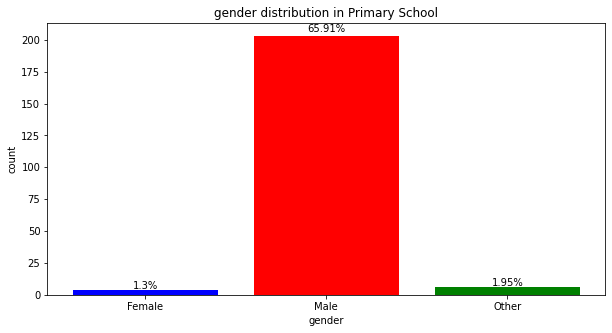

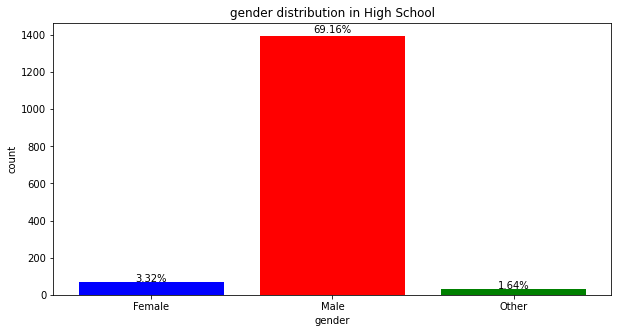

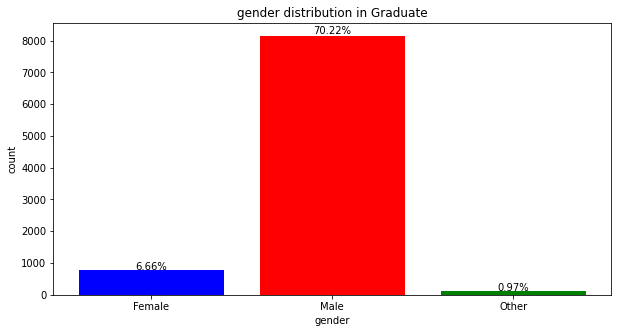

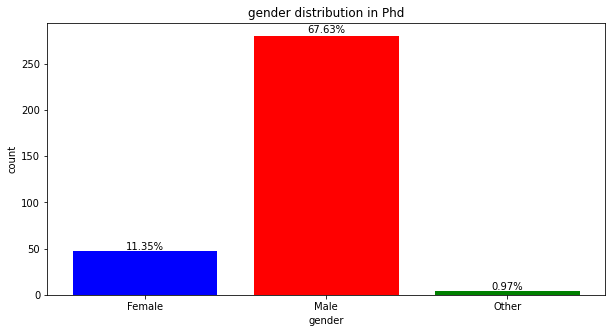

In [100]:
df = pd.read_csv('aug_train.csv')
for l in set(df['education_level']):
  if str(l) == 'nan':
    continue
  res = df[df['education_level']==l].groupby('gender').count()['enrollee_id']
  
  #.sort_values('enrollee_id', ascending=False)

  plt.figure(figsize=(10,5))
  graph = plt.bar([str(i) for i in res.keys()], res.values, color=['blue', 'red', 'green'])
  plt.title('gender distribution in '+str(l))
  plt.xlabel('gender')
  plt.ylabel('count')


  i = 0
  for p in graph:
      width = p.get_width()
      height = p.get_height()
      x, y = p.get_xy()
      
      plt.text(x+width/2,
              y+height*1.01+1,
              str(round(100*res.values[i]/df[df['education_level']==l]['target'].count(),2))+'%',
              ha='center'
              # , weight='bold'
              )
      i += 1
  plt.show()

We can observe that as education level increases, the percentage of females also increases.

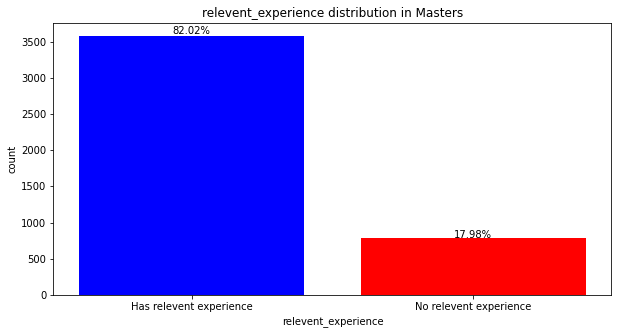

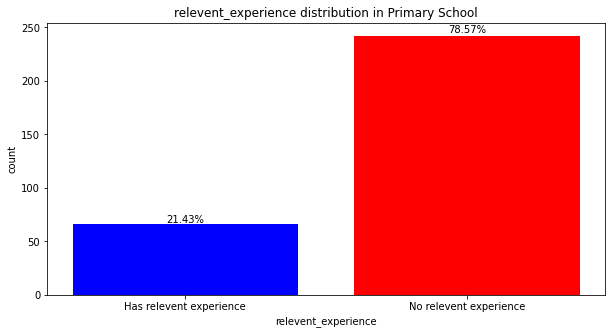

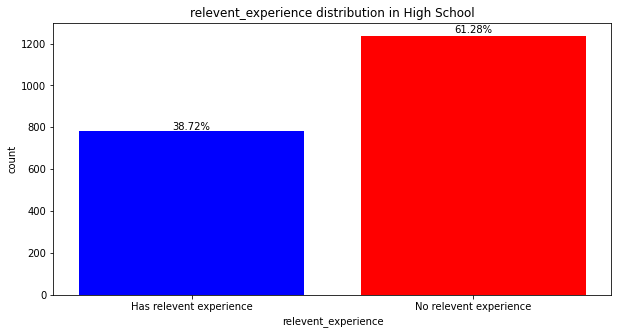

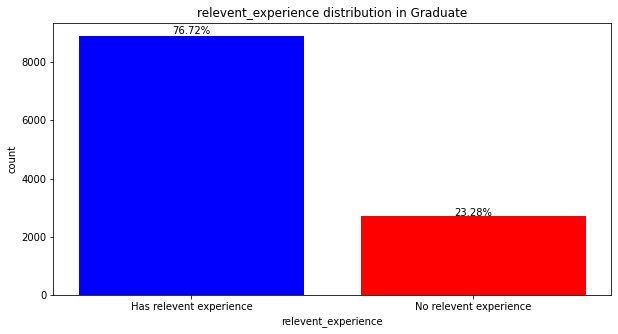

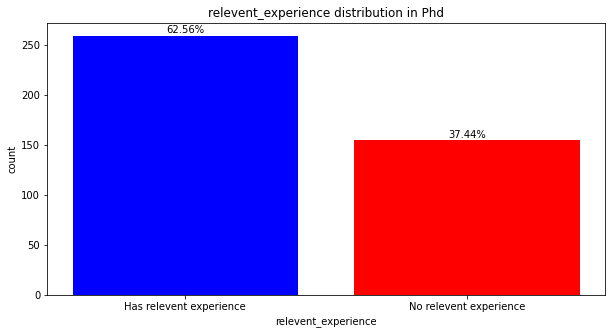

In [101]:
df = pd.read_csv('aug_train.csv')
for l in set(df['education_level']):
  if str(l) == 'nan':
    continue
  res = df[df['education_level']==l].groupby('relevent_experience').count()['enrollee_id']

  plt.figure(figsize=(10,5))
  graph = plt.bar([str(i) for i in res.keys()], res.values, color=['blue', 'red'])
  plt.title('relevent_experience distribution in '+str(l))
  plt.xlabel('relevent_experience')
  plt.ylabel('count')


  i = 0
  for p in graph:
      width = p.get_width()
      height = p.get_height()
      x, y = p.get_xy()
      
      plt.text(x+width/2,
              y+height*1.01+0.5,
              str(round(100*res.values[i]/df[df['education_level']==l]['target'].count(),2))+'%',
              ha='center')
      i += 1
  plt.show()

In this graph, we can see a positive relationship between the variables. The higher the education level, the greater amount of candidates with relevant experience in the data science field.

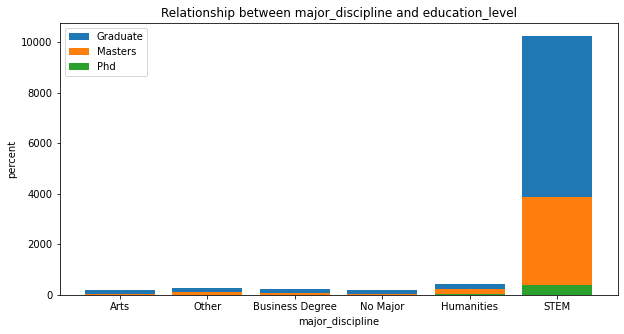

In [102]:
df = pd.read_csv('aug_train.csv')

plt.figure(figsize=(10,5))

labels = []
for i in set(df['major_discipline']):
  if str(i) == 'nan':
    continue
  labels.append(i)

for l in ['Graduate', 'Masters', 'Phd']:
  res2 = df[df['education_level']==l].groupby(['major_discipline']).count()
  res21 = res2['enrollee_id']
  labels2 = []
  for i in labels:
    if i in res21.keys():
      labels2.append(res21[i])
    else:
      labels2.append(0)
  plt.bar(labels, labels2, label=str(l))

plt.title('Relationship between major_discipline and education_level')
plt.xlabel('major_discipline')
plt.ylabel('percent')
plt.legend();

As expected, STEM is the most common discipline for data scientists.

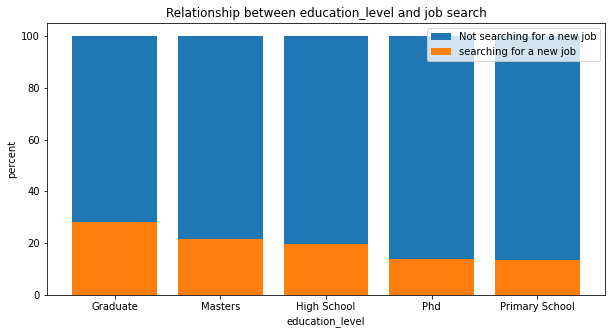

In [103]:
df = pd.read_csv('aug_train.csv')
res = df.groupby('education_level').count().sort_values('enrollee_id', ascending=False)['enrollee_id']

res2 = df.groupby(['education_level','target']).count().loc[res.keys(),:]

res20 = res2.loc[:,0,:]['enrollee_id']
res21 = res2.loc[:,1,:]['enrollee_id']
f_index = [100*res21[i]/(res21[i]+res20[i]) for i in res21.keys()]

plt.figure(figsize=(10,5))
plt.bar([str(i) for i in res21.keys()], [100 for i in res21.keys()], label='Not searching for a new job')
plt.bar([str(i) for i in res21.keys()], [100*res21[i]/(res21[i]+res20[i]) for i in res21.keys()], label='searching for a new job')
plt.title('Relationship between education_level and job search')
plt.xlabel('education_level')
plt.ylabel('percent')
plt.legend();

The percentage of people looking for a new job is almost the same for all education levels. The distribution of job seekers in different categories of education level seems to be the same. If the distribution of job seekers are same in all categories, it indicates that the two variables are independent of each other. education level has no effect on changing the proportion of job seekers. We use the independence test to prove it.

In [104]:
ct = pd.crosstab(df.target, df.education_level)
ct

education_level,Graduate,High School,Masters,Phd,Primary School
target,,,,,
0.0,8353,1623,3426,356,267
1.0,3245,394,935,58,41


In [105]:
from scipy.stats import chi2_contingency

obs = np.array([ct.iloc[0][:].values,
                  ct.iloc[1][:].values])
print('x^2:',chi2_contingency(obs)[0],'p_val:',chi2_contingency(obs)[1],'df:',chi2_contingency(obs)[2])

x^2: 165.65538908719 p_val: 8.949047910389103e-35 df: 4


The value of p_value is less than alpha, ie 0.05. This means that the null hypothesis is rejected and two variables are dependent. That is, knowing the education level of the candidate give us information about whether the person will be looking for a new job. The p_value value is too far from alpha. That is, the relationship between the two variables was strong. The relationship between the two is close to being a very strong connection rather than independent connection.

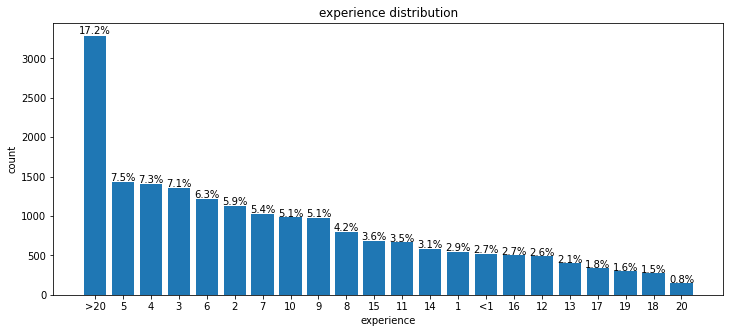

In [106]:
df = pd.read_csv('aug_train.csv')
res = df.groupby('experience').count().sort_values('enrollee_id', ascending=False)['enrollee_id']

plt.figure(figsize=(12,5))
graph = plt.bar([str(i) for i in res.keys()], res.values)
plt.title('experience distribution')
plt.xlabel('experience')
plt.ylabel('count')


i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
     
    plt.text(x+width/2,
             y+height*1.01,
             str(round(100*res.values[i]/df['target'].count(),1))+'%',
             ha='center')
    i += 1

In this sample, over 50% of candidates have between 2 and 10 years of work experience.

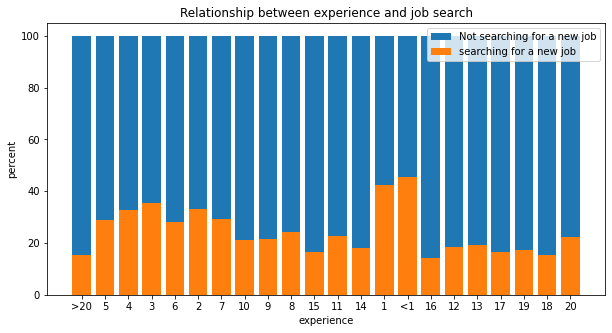

In [107]:
df = pd.read_csv('aug_train.csv')
res = df.groupby('experience').count().sort_values('enrollee_id', ascending=False)['enrollee_id']

res2 = df.groupby(['experience','target']).count().loc[res.keys(),:]

res20 = res2.loc[:,0,:]['enrollee_id']
res21 = res2.loc[:,1,:]['enrollee_id']
f_index = [100*res21[i]/(res21[i]+res20[i]) for i in res21.keys()]

plt.figure(figsize=(10,5))
plt.bar([str(i) for i in res21.keys()], [100 for i in res21.keys()], label='Not searching for a new job')
plt.bar([str(i) for i in res21.keys()], [100*res21[i]/(res21[i]+res20[i]) for i in res21.keys()], label='searching for a new job')
plt.title('Relationship between experience and job search')
plt.xlabel('experience')
plt.ylabel('percent')
plt.legend();

The less work experience, the more probable the candidate is searching for a new job.

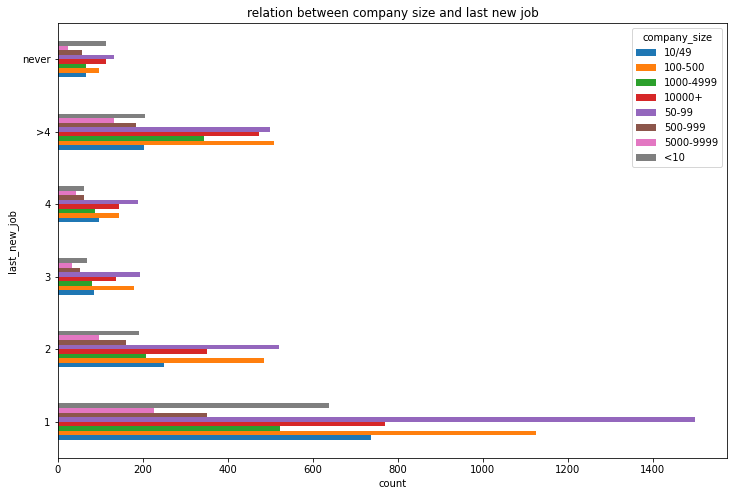

In [108]:

ax = pd.pivot_table(
	df,
	values="enrollee_id",
	index="last_new_job",
	columns="company_size",
	aggfunc='count'
).plot(kind="barh")

fig = ax.get_figure()

fig.set_size_inches(12, 8)

ax.set_xlabel("count")
ax.set_title("relation between company size and last new job");

We can observe that regardless of company size, most candidates had their last new job a year ago.

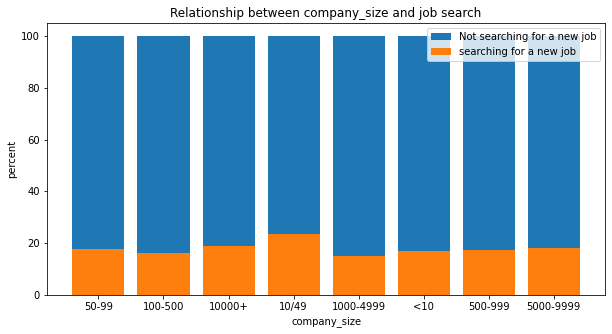

In [109]:
df = pd.read_csv('aug_train.csv')
res = df.groupby('company_size').count().sort_values('enrollee_id', ascending=False)['enrollee_id']

res2 = df.groupby(['company_size','target']).count().loc[res.keys(),:]

res20 = res2.loc[:,0,:]['enrollee_id']
res21 = res2.loc[:,1,:]['enrollee_id']
f_index = [100*res21[i]/(res21[i]+res20[i]) for i in res21.keys()]

plt.figure(figsize=(10,5))
plt.bar([str(i) for i in res21.keys()], [100 for i in res21.keys()], label='Not searching for a new job')
plt.bar([str(i) for i in res21.keys()], [100*res21[i]/(res21[i]+res20[i]) for i in res21.keys()], label='searching for a new job')
plt.title('Relationship between company_size and job search')
plt.xlabel('company_size')
plt.ylabel('percent')
plt.legend();

The proportion of candidates searching for a new job is fairly consistent across all company sizes. The percentage of people looking for a new job is almost the same for all company sizes. The distribution of job seekers in different categories of company sizes seems to be the same. If the distribution of job seekers are same in all categories, it indicates that the two variables are independent of each other. company sizes has no effect on changing the proportion of job seekers. We use the independence test to prove it.

In [110]:
ct = pd.crosstab(df.target, df.company_size)
ct

company_size,10/49,100-500,1000-4999,10000+,50-99,500-999,5000-9999,<10
target,,,,,,,,
0.0,1127,2156,1128,1634,2538,725,461,1084
1.0,344,415,200,385,545,152,102,224


In [111]:
from scipy.stats import chi2_contingency

obs = np.array([ct.iloc[0][:].values,
                  ct.iloc[1][:].values])
print('x^2:',chi2_contingency(obs)[0],'p_val:',chi2_contingency(obs)[1],'df:',chi2_contingency(obs)[2])

x^2: 45.53175529315902 p_val: 1.0781332047560822e-07 df: 7


The value of p_value is less than alpha, ie 0.05. This means that the null hypothesis is rejected and two variables are dependent. That is, knowing the company_size of the candidate give us information about whether the person will be looking for a new job. The p_value value is too far from alpha. That is, the relationship between the two variables was strong. The relationship between the two is close to being a very strong connection rather than independent connection.

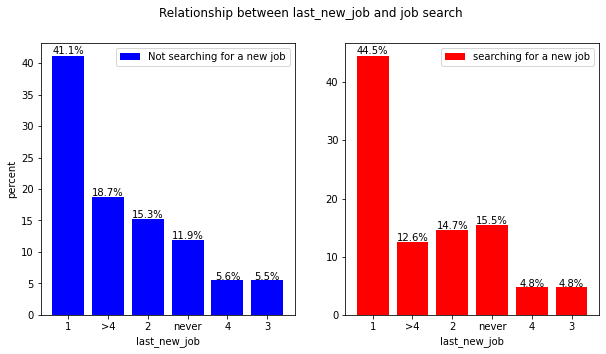

In [112]:

df = pd.read_csv('aug_train.csv')
res = df.groupby('last_new_job').count().sort_values('enrollee_id', ascending=False)['enrollee_id']
ser = df.groupby('target').count().sort_values('enrollee_id', ascending=False)['enrollee_id']

res2 = df.groupby(['last_new_job','target']).count().loc[res.keys(),:]

res20 = res2.loc[:,0,:]['enrollee_id']
res21 = res2.loc[:,1,:]['enrollee_id']
f_index = [100*res21[i]/(res21[i]+res20[i]) for i in res21.keys()]

# print(ser)

plt.figure(figsize=(10,5))
plt.suptitle('Relationship between last_new_job and job search')

plt.subplot(1, 2, 1)
graph = plt.bar([str(i) for i in res21.keys()], [100*res20[i]/ser[0.0] for i in res21.keys()],
        label='Not searching for a new job', color='blue')

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
     
    plt.text(x+width/2,
             y+height*1.01,
             str(round(100*res20.values[i]/ser[0.0],1))+'%',
             ha='center')
    i += 1

plt.xlabel('last_new_job')
plt.ylabel('percent')
plt.legend()

plt.subplot(1, 2, 2)
graph = plt.bar([str(i) for i in res21.keys()], [100*res21[i]/ser[1.0] for i in res21.keys()],
        label='searching for a new job', color='red')

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
     
    plt.text(x+width/2,
             y+height*1.01,
             str(round(100*res21.values[i]/ser[1.0],1))+'%',
             ha='center')
    i += 1
    
plt.xlabel('last_new_job')
plt.legend();

We can see that both types of candidates follow a similar distribution. The percentage of job seekers in each last_new_job category is shown below.

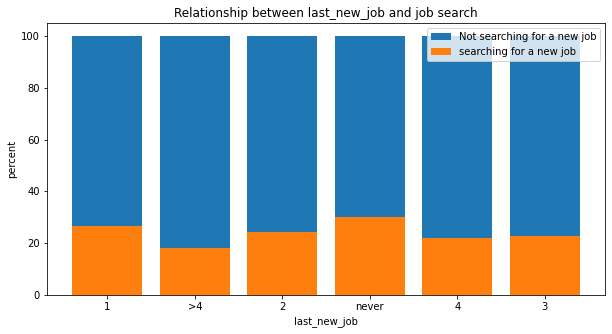

In [113]:
df = pd.read_csv('aug_train.csv')
res = df.groupby('last_new_job').count().sort_values('enrollee_id', ascending=False)['enrollee_id']

res2 = df.groupby(['last_new_job','target']).count().loc[res.keys(),:]

res20 = res2.loc[:,0,:]['enrollee_id']
res21 = res2.loc[:,1,:]['enrollee_id']
f_index = [100*res21[i]/(res21[i]+res20[i]) for i in res21.keys()]

plt.figure(figsize=(10,5))
plt.bar([str(i) for i in res21.keys()], [100 for i in res21.keys()], label='Not searching for a new job')
plt.bar([str(i) for i in res21.keys()], [100*res21[i]/(res21[i]+res20[i]) for i in res21.keys()], label='searching for a new job')
plt.title('Relationship between last_new_job and job search')
plt.xlabel('last_new_job')
plt.ylabel('percent')
plt.legend();

The proportion of candidates searching for a new job is fairly consistent across all last_new_job categories. The percentage of people looking for a new job is almost the same for all last_new_job categories. The distribution of job seekers in different categories of last_new_job seems to be the same. If the distribution of job seekers are same in all categories, it indicates that the two variables are independent of each other. last_new_job categories has no effect on changing the proportion of job seekers. We use the independence test to prove it.

In [114]:
ct = pd.crosstab(df.target, df.last_new_job)
ct

last_new_job,1,2,3,4,>4,never
target,,,,,,
0.0,5915,2200,793,801,2690,1713
1.0,2125,700,231,228,600,739


In [115]:
from scipy.stats import chi2_contingency

obs = np.array([ct.iloc[0][:].values,
                  ct.iloc[1][:].values])
print('x^2:',chi2_contingency(obs)[0],'p_val:',chi2_contingency(obs)[1],'df:',chi2_contingency(obs)[2])

x^2: 132.49948396906083 p_val: 7.015169967001471e-27 df: 5


The value of p_value is less than alpha, ie 0.05. This means that the null hypothesis is rejected and two variables are dependent. That is, knowing the last_new_job of the candidate give us information about whether the person will be looking for a new job. The p_value value is too far from alpha. That is, the relationship between the two variables was strong. The relationship between the two is close to being a very strong connection rather than independent connection.

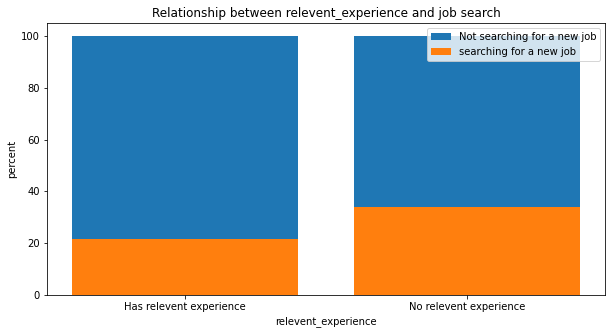

In [116]:
df = pd.read_csv('aug_train.csv')
res = df.groupby('relevent_experience').count().sort_values('enrollee_id', ascending=False)['enrollee_id']

res2 = df.groupby(['relevent_experience','target']).count().loc[res.keys(),:]

res20 = res2.loc[:,0,:]['enrollee_id']
res21 = res2.loc[:,1,:]['enrollee_id']
f_index = [100*res21[i]/(res21[i]+res20[i]) for i in res21.keys()]

plt.figure(figsize=(10,5))
plt.bar([str(i) for i in res21.keys()], [100 for i in res21.keys()], label='Not searching for a new job')
plt.bar([str(i) for i in res21.keys()], [100*res21[i]/(res21[i]+res20[i]) for i in res21.keys()], label='searching for a new job')
plt.title('Relationship between relevent_experience and job search')
plt.xlabel('relevent_experience')
plt.ylabel('percent')
plt.legend();

It seems that the difference in the percentage of job seekers in the two categories is not significant. It seems that the distribution of job seekers is equal in two categories and the two variables are independent. we use independent test to prove this.

In [117]:
ct = pd.crosstab(df.target, df.relevent_experience)
ct

relevent_experience,Has relevent experience,No relevent experience
target,,
0.0,10831,3550
1.0,2961,1816


In [118]:
from scipy.stats import chi2_contingency

obs = np.array([ct.iloc[0][:].values,
                  ct.iloc[1][:].values])
print('x^2:',chi2_contingency(obs)[0],'p_val:',chi2_contingency(obs)[1],'df:',chi2_contingency(obs)[2])

x^2: 315.33857672021657 p_val: 1.5006628411178982e-70 df: 1


The value of p_value is less than alpha, ie 0.05. This means that the null hypothesis is rejected and two variables are dependent. That is, knowing the relevent_experience of the candidate give us information about whether the person will be looking for a new job. The p_value value is too far from alpha. That is, the relationship between the two variables was strong. The relationship between the two is close to being a very strong connection rather than independent connection.

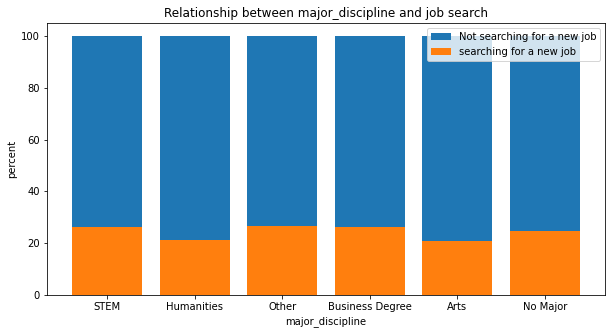

In [119]:
df = pd.read_csv('aug_train.csv')
res = df.groupby('major_discipline').count().sort_values('enrollee_id', ascending=False)['enrollee_id']

res2 = df.groupby(['major_discipline','target']).count().loc[res.keys(),:]

res20 = res2.loc[:,0,:]['enrollee_id']
res21 = res2.loc[:,1,:]['enrollee_id']
f_index = [100*res21[i]/(res21[i]+res20[i]) for i in res21.keys()]

plt.figure(figsize=(10,5))
plt.bar([str(i) for i in res21.keys()], [100 for i in res21.keys()], label='Not searching for a new job')
plt.bar([str(i) for i in res21.keys()], [100*res21[i]/(res21[i]+res20[i]) for i in res21.keys()], label='searching for a new job')
plt.title('Relationship between major_discipline and job search')
plt.xlabel('major_discipline')
plt.ylabel('percent')
plt.legend();

It seems that the difference in the percentage of job seekers in the categories is not significant. It seems that the distribution of job seekers is equal in categories and the two variables are independent. we use independent test to prove this.

In [120]:
df = pd.read_csv('aug_train.csv')
ct = pd.crosstab(df.target, df.major_discipline)
ct

major_discipline,Arts,Business Degree,Humanities,No Major,Other,STEM
target,,,,,,
0.0,200,241,528,168,279,10701
1.0,53,86,141,55,102,3791


In [121]:
from scipy.stats import chi2_contingency

obs = np.array([ct.iloc[0][:].values,
                  ct.iloc[1][:].values])
print('x^2:',chi2_contingency(obs)[0],'p_val:',chi2_contingency(obs)[1],'df:',chi2_contingency(obs)[2])

x^2: 12.207121063439173 p_val: 0.03205735800130323 df: 5


The value of p_value is less than alpha, ie 0.05. That is, the null hypothesis is rejected and the two variables are dependent. The value of p_value is close to alpha. This means that we have low confidence in this decision. Also, this value is close to alpha, ie there is a weak relationship between the two variables. Also, the desired alpha value is a common value for such tests. We set this value and it can change. This value can change according to our expectations.

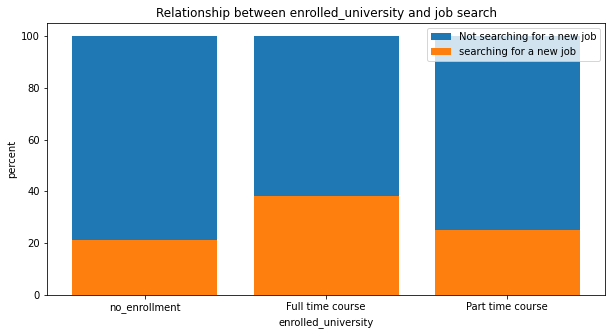

In [122]:
df = pd.read_csv('aug_train.csv')
res = df.groupby('enrolled_university').count().sort_values('enrollee_id', ascending=False)['enrollee_id']

res2 = df.groupby(['enrolled_university','target']).count().loc[res.keys(),:]

res20 = res2.loc[:,0,:]['enrollee_id']
res21 = res2.loc[:,1,:]['enrollee_id']
f_index = [100*res21[i]/(res21[i]+res20[i]) for i in res21.keys()]

plt.figure(figsize=(10,5))
plt.bar([str(i) for i in res21.keys()], [100 for i in res21.keys()], label='Not searching for a new job')
plt.bar([str(i) for i in res21.keys()], [100*res21[i]/(res21[i]+res20[i]) for i in res21.keys()], label='searching for a new job')
plt.title('Relationship between enrolled_university and job search')
plt.xlabel('enrolled_university')
plt.ylabel('percent')
plt.legend();

We examine the independence of two variables.

In [123]:
ct = pd.crosstab(df.target, df.enrolled_university)
ct

enrolled_university,Full time course,Part time course,no_enrollment
target,,,
0.0,2326,896,10896
1.0,1431,302,2921


In [124]:
from scipy.stats import chi2_contingency

obs = np.array([ct.iloc[0][:].values,
                  ct.iloc[1][:].values])
print('x^2:',chi2_contingency(obs)[0],'p_val:',chi2_contingency(obs)[1],'df:',chi2_contingency(obs)[2])

x^2: 455.166762018575 p_val: 1.4514211750080545e-99 df: 2


The value of p_value is less than alpha, ie 0.05. This means that the null hypothesis is rejected and two variables are dependent. That is, knowing the enrolled_university of the candidate give us information about whether the person will be looking for a new job. The p_value value is too far from alpha. That is, the relationship between the two variables was strong. The relationship between the two is close to being a very strong connection rather than independent connection.

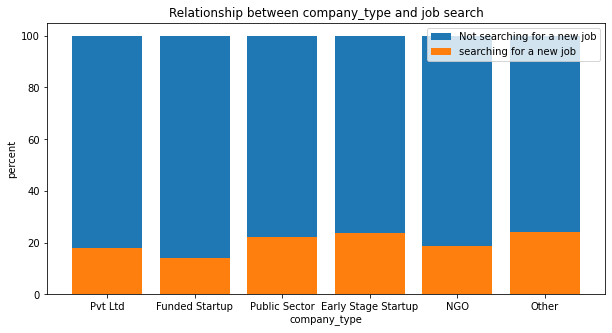

In [125]:
df = pd.read_csv('aug_train.csv')
res = df.groupby('company_type').count().sort_values('enrollee_id', ascending=False)['enrollee_id']

res2 = df.groupby(['company_type','target']).count().loc[res.keys(),:]

res20 = res2.loc[:,0,:]['enrollee_id']
res21 = res2.loc[:,1,:]['enrollee_id']
f_index = [100*res21[i]/(res21[i]+res20[i]) for i in res21.keys()]

plt.figure(figsize=(10,5))
plt.bar([str(i) for i in res21.keys()], [100 for i in res21.keys()], label='Not searching for a new job')
plt.bar([str(i) for i in res21.keys()], [100*res21[i]/(res21[i]+res20[i]) for i in res21.keys()], label='searching for a new job')
plt.title('Relationship between company_type and job search')
plt.xlabel('company_type')
plt.ylabel('percent')
plt.legend();

We examine the independence of two variables.

In [126]:
ct = pd.crosstab(df.target, df.company_type)
ct

company_type,Early Stage Startup,Funded Startup,NGO,Other,Public Sector,Pvt Ltd
target,,,,,,
0.0,461,861,424,92,745,8042
1.0,142,140,97,29,210,1775


In [127]:
from scipy.stats import chi2_contingency

obs = np.array([ct.iloc[0][:].values,
                  ct.iloc[1][:].values])
print('x^2:',chi2_contingency(obs)[0],'p_val:',chi2_contingency(obs)[1],'df:',chi2_contingency(obs)[2])

x^2: 35.03547546070746 p_val: 1.4803202994777527e-06 df: 5


The value of p_value is less than alpha, ie 0.05. This means that the null hypothesis is rejected and two variables are dependent. That is, knowing the company_type of the candidate give us information about whether the person will be looking for a new job. The p_value value is too far from alpha. That is, the relationship between the two variables was strong. The relationship between the two is close to being a very strong connection rather than independent connection.

In [128]:
from itertools import combinations

cat_cols=['target', 'major_discipline', 'city',	'gender', 'relevent_experience', 'enrolled_university', 'education_level',
          'experience', 'company_size', 'company_type', 'last_new_job']

df = pd.read_csv('aug_train.csv')

scol=[]
scol2=[]
spval=[]
ss=[]
for i in combinations(cat_cols, 2):
    scol.append(i[0])
    scol2.append(i[1])
    cp=chi2_contingency(pd.crosstab(df[i[0]],df[i[1]]))[1]
    spval.append(round(cp,4))
    if (cp<0.05):
        #rejects Null
        ss.append('*')#signficant
    else:#Accepts Null
        ss.append('**')#not significant

pd.DataFrame({'var1':scol,'var2':scol2,'P-Value':spval,'Significance':ss})

,var1,var2,P-Value,Significance
0,target,major_discipline,0.0321,*
1,target,city,0.0000,*
2,target,gender,0.0109,*
3,target,relevent_experience,0.0000,*
4,target,enrolled_university,0.0000,*
5,target,education_level,0.0000,*
6,target,experience,0.0000,*
7,target,company_size,0.0000,*
8,target,company_type,0.0000,*
9,target,last_new_job,0.0000,*


As you can see, p_value is less than alpha in most rows. That is, two categorical variables are dependent. That is, there is a relationship between them and they are not completely independent of each other. Accordingly, we examined the effect of a number of these pairs. To see the interesting relationships between a number of pairs. As can be seen, all variables have an impact on the target. That is, we must use all of these variables in model construction. The two variables, gender and company size, have a p_value value greater than alpha. That is, these two variables are independent of each other. To solve the problem of repetitive information caused by the relationships of variables in the model, data dimension reduction can be used. This relationship between the variables helps us to fill the nans with other variables.

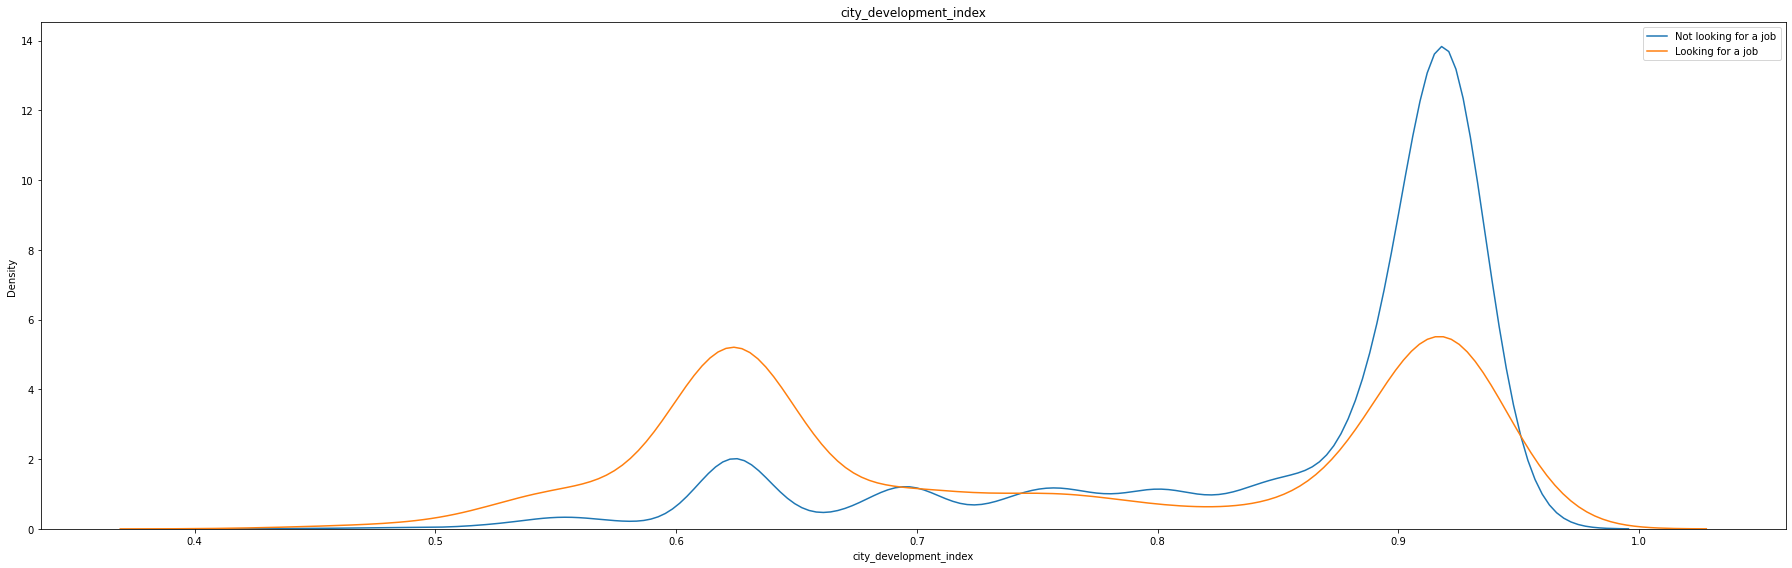

In [129]:
import seaborn as sns

figure = plt.figure(figsize=(25,8))

df = pd.read_csv('aug_train.csv')

sns.kdeplot(x=df[df['target']==0]["city_development_index"],label="Not looking for a job")
sns.kdeplot(x=df[df['target']==1]["city_development_index"],label="Looking for a job")
plt.legend(prop=dict(size=10))
plt.title("city_development_index")
plt.tight_layout()
plt.show()

As can be seen, the two distributions are not the same. There is a range where the distribution for target with a value of zero is higher than the distribution for target with a value of one. There is a range where the distribution for target with a value of one is higher than the distribution for target with a value of zero. target with a value of one means people who are looking for a new job. This difference helps to determine the target value of the data according to the index value. This means that this index has a significant effect on the data label and there is a relationship between the label and the index.

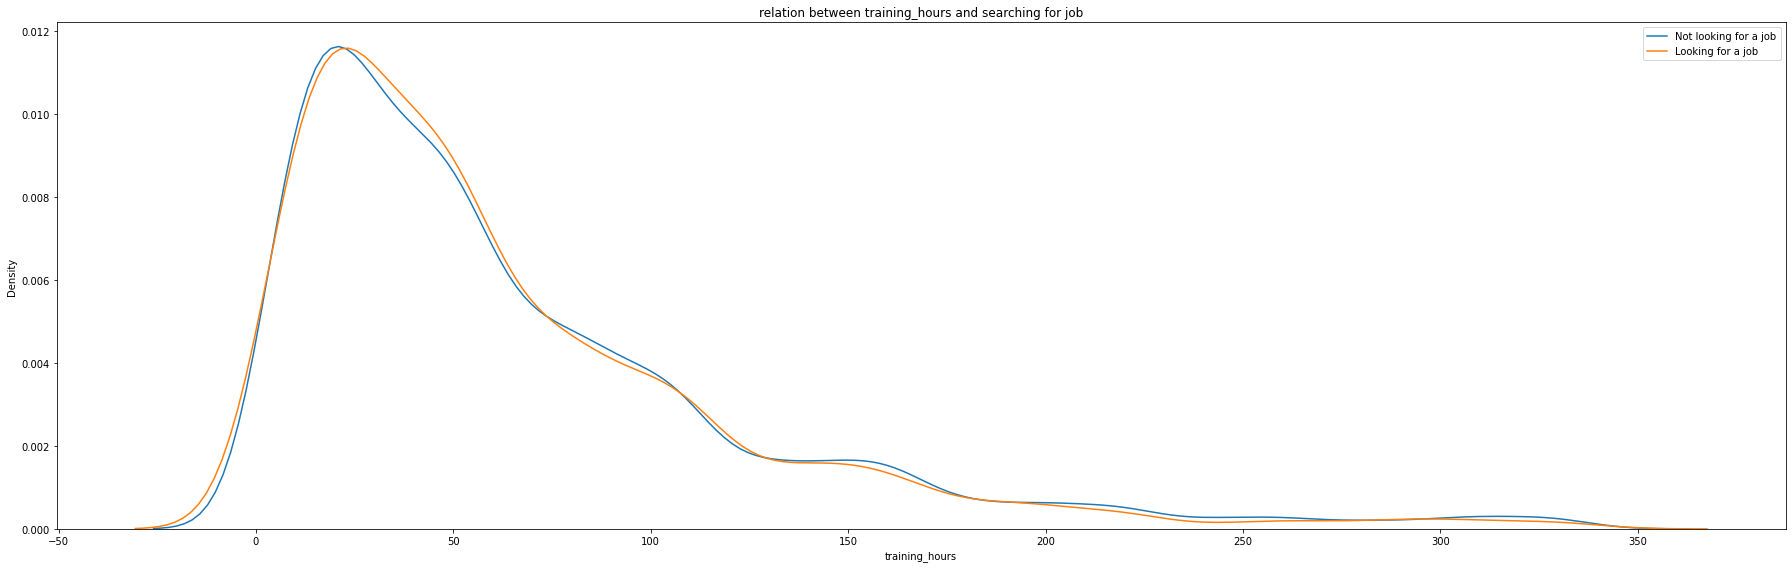

In [130]:
import seaborn as sns

figure = plt.figure(figsize=(25,8))

df = pd.read_csv('aug_train.csv')

sns.kdeplot(x=df[df['target']==0]["training_hours"],label="Not looking for a job")
sns.kdeplot(x=df[df['target']==1]["training_hours"],label="Looking for a job")
plt.legend(prop=dict(size=10))
plt.title("relation between training_hours and searching for job")
plt.tight_layout()
plt.show()

We can observe that both lines have almost the same trend. This can tell us that training hours don’t have a large impact on job search.

We use correlation to examine the relationship between numerical variables. Of course, correlation only examines linear relationship.

Text(0.5, 1.0, 'Correlation Heatmap')

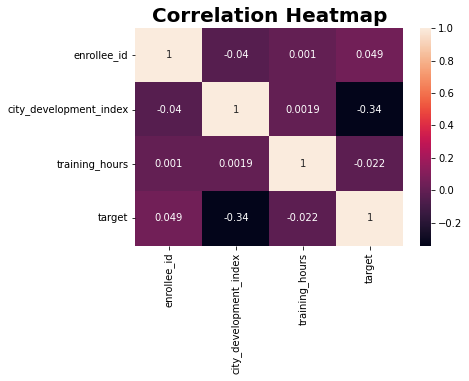

In [131]:
df = pd.read_csv('aug_train.csv')
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Heatmap', weight='bold',fontsize=20)

As can be seen, there is a correlation between the target and the two variables of developmental criteria and training hours. The abs of the correlation between the target and the development criterion is greater than the abs of the correlation between the target and the training hours. That is, the relationship between the development criterion and the label is stronger. We also saw this in the study of probability distributions.

In [132]:
train = pd.read_csv('aug_train.csv')

In [133]:
from sklearn.preprocessing import LabelEncoder

# I do this manually to explicitly tell the model that a better education & experience serves well as a trustworthy input.

# However, later we wil see the feature importanes report in SHAP and notice interesting results.
experience_dict = {'Has relevent experience' : 1,
             'No relevent experience': 0}

education_dict = {'Graduate':3, 'High School':2,
                  'Masters':4, 'Phd':5, 'Primary School':1}

enrollment_dict = {'no_enrollment' : 2,
             'Full time course' : 1,
             'Part time course' : 0}

gender_dict = {'Male' : 2,
             'Female' : 1,
             'Other' : 0}

discipline_dict = {'STEM' : 5,
             'Humanities' : 4,
             'Business Degree' : 3,
             'Other' : 2,
             'No Major' : 1,
             'Arts' : 0 }

company_dict = {'Pvt Ltd' : 5,
             'Funded Startup' : 4,
             'Public Sector' : 3,
             'Early Stage Startup' : 2,
             'NGO' : 1,
             'Other' : 0 }


# Train encoding
le = LabelEncoder()
train['gender'] = train['gender'].map(gender_dict)
train['relevent_experience'] = train['relevent_experience'].map(experience_dict)
train['education_level'] = train['education_level'].map(education_dict)
train['enrolled_university'] = train['enrolled_university'].map(enrollment_dict)
train['major_discipline'] = train['major_discipline'].map(discipline_dict)
train['experience'] = le.fit_transform(train['experience'].astype(str))
train['company_size'] = le.fit_transform(train['company_size'].astype(str))
train['company_type'] = train['company_type'].map(company_dict)
train['last_new_job'] = le.fit_transform(train['last_new_job'].astype(str))

Text(0.5, 1.0, 'Correlation Heatmap')

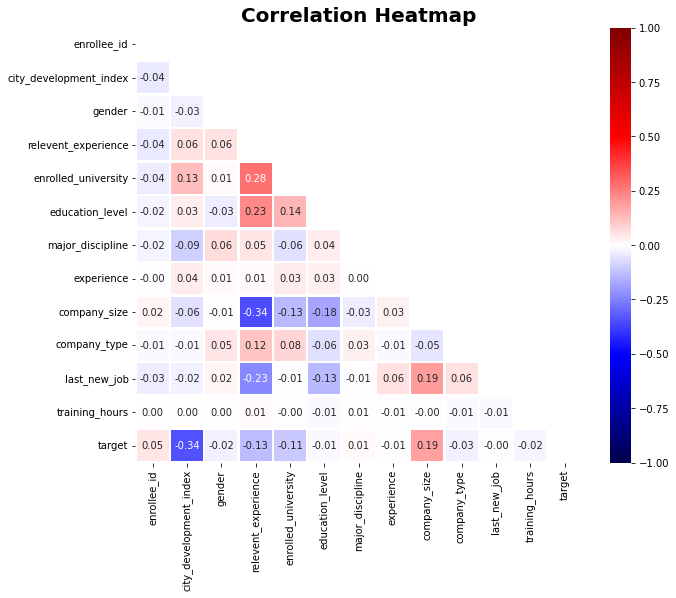

In [134]:
corr_matrix = train.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
fig = plt.figure(figsize=[10,8])
sns.heatmap(corr_matrix,cmap='seismic',linewidth=1.5,linecolor='white',vmax = 1, vmin=-1,mask=mask, annot=True,fmt='0.2f')
plt.title('Correlation Heatmap', weight='bold',fontsize=20)

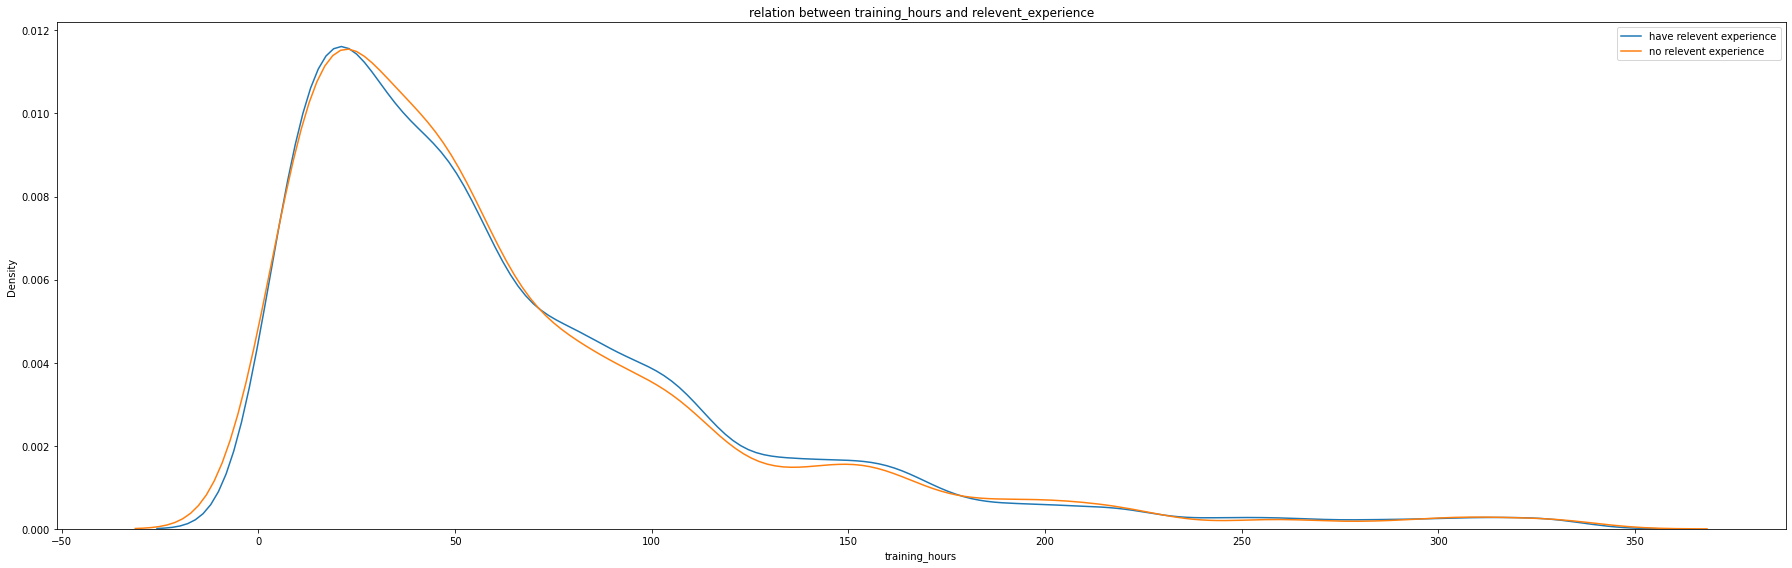

In [135]:
import seaborn as sns

figure = plt.figure(figsize=(25,8))

df = pd.read_csv('aug_train.csv')

sns.kdeplot(x=train[train['relevent_experience']==1]['training_hours'],label="have relevent experience")
sns.kdeplot(x=train[train['relevent_experience']==0]['training_hours'],label="no relevent experience")
plt.legend(prop=dict(size=10))
plt.title("relation between training_hours and relevent_experience")
plt.tight_layout()
plt.show()

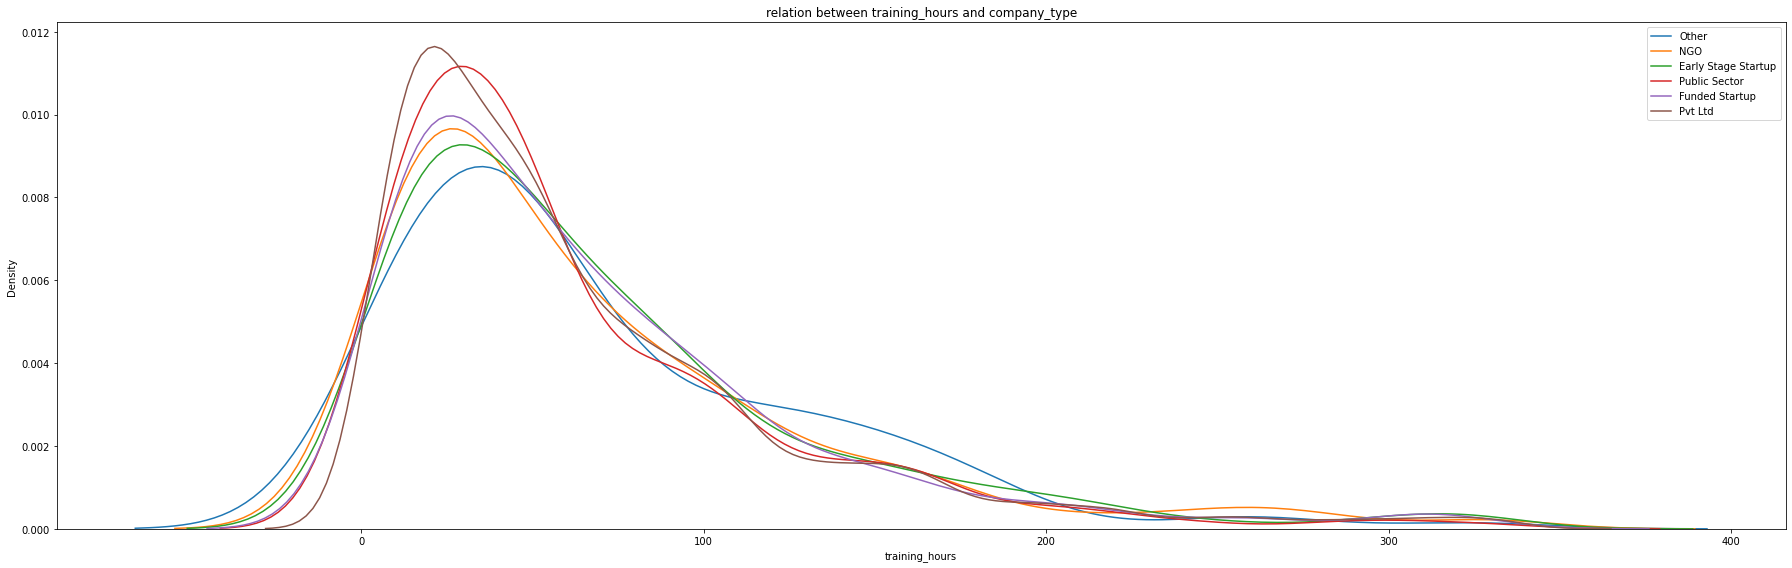

In [136]:
import seaborn as sns

figure = plt.figure(figsize=(25,8))

df = pd.read_csv('aug_train.csv')

sns.kdeplot(x=train[train['company_type']==0]['training_hours'],label='Other')
sns.kdeplot(x=train[train['company_type']==1]['training_hours'],label='NGO')
sns.kdeplot(x=train[train['company_type']==2]['training_hours'],label='Early Stage Startup')
sns.kdeplot(x=train[train['company_type']==3]['training_hours'],label='Public Sector')
sns.kdeplot(x=train[train['company_type']==4]['training_hours'],label='Funded Startup')
sns.kdeplot(x=train[train['company_type']==5]['training_hours'],label='Pvt Ltd')

plt.legend(prop=dict(size=10))
plt.title("relation between training_hours and company_type")
plt.tight_layout()
plt.show()

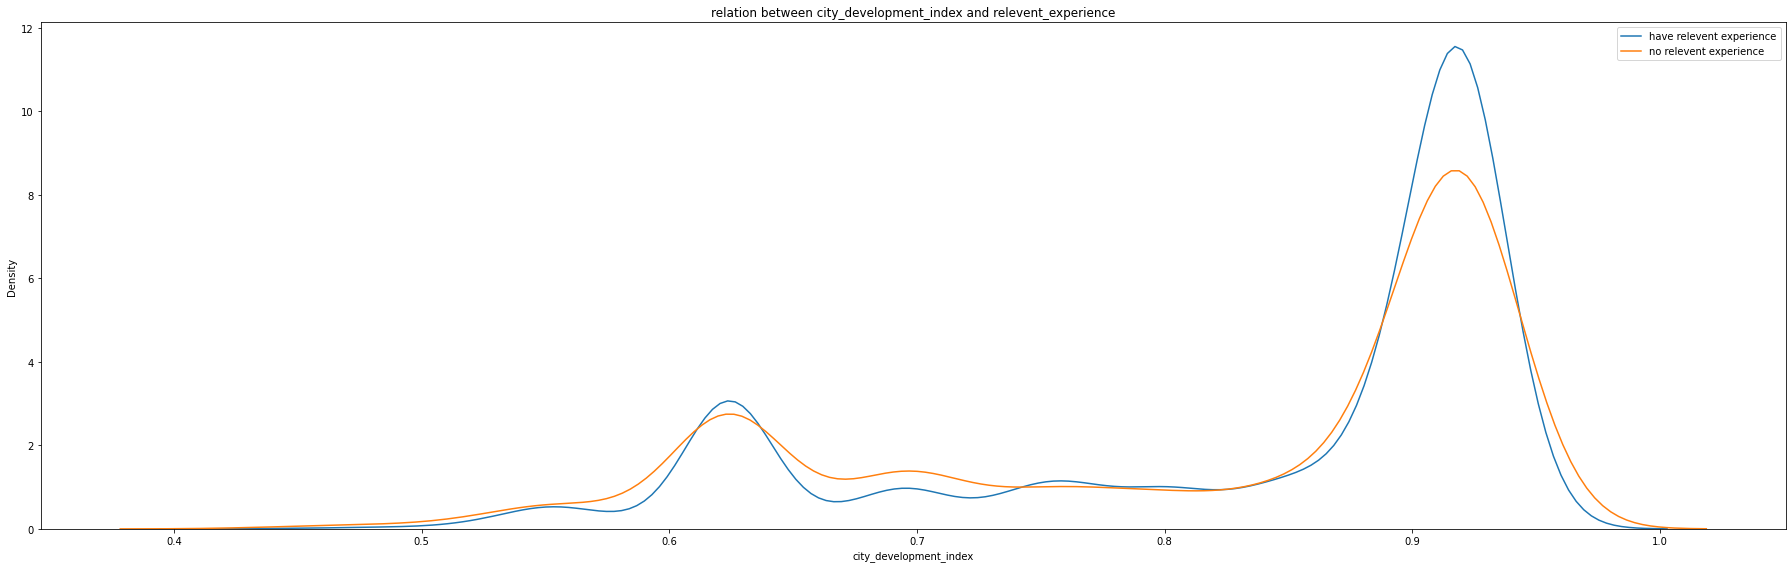

In [137]:
import seaborn as sns

figure = plt.figure(figsize=(25,8))

df = pd.read_csv('aug_train.csv')

sns.kdeplot(x=train[train['relevent_experience']==1]['city_development_index'],label="have relevent experience")
sns.kdeplot(x=train[train['relevent_experience']==0]['city_development_index'],label="no relevent experience")
plt.legend(prop=dict(size=10))
plt.title("relation between city_development_index and relevent_experience")
plt.tight_layout()
plt.show()

As can be seen in the correlation matrix and diagrams, there is at least a weak correlation between numerical and categorical variables. This means that other variables can be used to fill a variable nan.

# fill nan

In [138]:
df = pd.read_csv('aug_train.csv')
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

To determine how to solve the problem of nans for numerical variables, we must examine their distribution. We use boxplot for this.

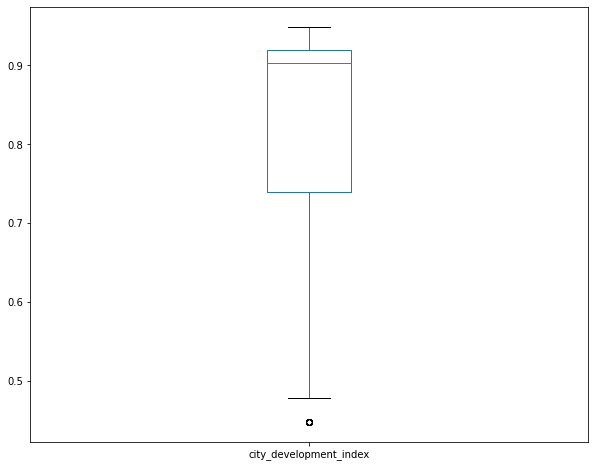

In [139]:
df[['city_development_index']].plot(kind='box', figsize= (10,8))

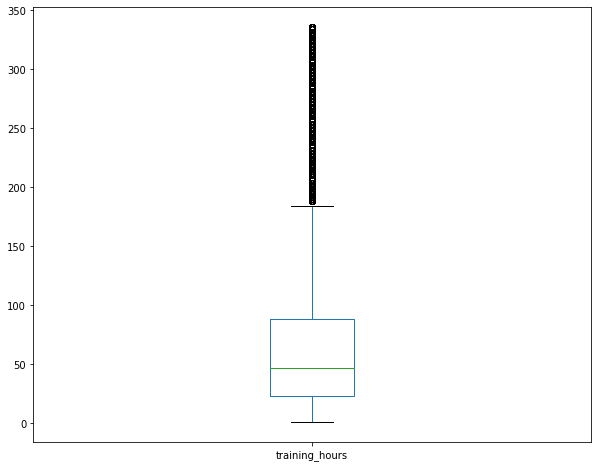

In [140]:
df[['training_hours']].plot(kind='box', figsize= (10,8))

In [141]:
df = pd.read_csv('aug_train.csv')
# show outliers of training hour
Q1 = df['training_hours'].quantile(0.25)
Q3 = df['training_hours'].quantile(0.75)
IQR = Q3 - Q1     
df[df['training_hours']>Q3 + 1.5 *IQR]
# major or extreme outlier
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  display(df[df['training_hours']>Q3 + 3 *IQR])

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
89,32401,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,6,100-500,NaN,1,332,0.0
133,32776,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,NaN,NaN,4,290,0.0
161,13333,city_75,0.939,NaN,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,never,326,0.0
299,12117,city_74,0.579,Male,Has relevent experience,no_enrollment,Graduate,STEM,4,10/49,Pvt Ltd,1,320,0.0
331,13788,city_93,0.865,NaN,No relevent experience,no_enrollment,NaN,NaN,3,NaN,NaN,never,302,0.0
382,26388,city_136,0.897,Male,No relevent experience,Full time course,Masters,STEM,5,NaN,NaN,4,288,1.0
410,4626,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,2,NaN,Pvt Ltd,never,306,0.0
422,15796,city_71,0.884,Female,Has relevent experience,no_enrollment,Masters,STEM,3,NaN,NaN,2,322,1.0
507,19555,city_65,0.802,Male,Has relevent experience,Full time course,Graduate,STEM,8,5000-9999,Pvt Ltd,2,314,0.0
705,26126,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,Humanities,13,50-99,Pvt Ltd,1,326,0.0


There are several categories among outlier candidates. People who do not have a similar work or educational background and have been trained for many hours to make up for deficiencies. People who have had difficulty in one of their studies or experiences and have trained for many hours. People who have a good background but have trained for many hours. The first two categories have normal behavior. The latter category can also behave naturally. There are people who have forgotten the points and need to be reminded. Or there are people whose background level was lower than the company. Or there are people who want to adapt to the situation. The difference between the candidate data and the limit is 100 hours. This means that the error in the number can be due to the first digit to the left of the number or the number of digits. Given these cases, none of the candidates can be eliminated with high confidence.

Only the variable of training hours has nan. As can be seen, the distribution of this variable is skewed and is not as symmetric as the normal distribution. There are also many outlier in this variable. For this reason, we use the median to fill in the blanks. Of course, another way to use regression based on other variables is imputation. The best way is determined based on the performance of the classifier on the data. The method that optimizes performance is the best way to fill.

In [142]:
nand = df.isna().sum()
s = np.sum(nand.values)
pd.DataFrame({'column':nand.keys(), 'percent':nand.values/s})

,column,percent
0,enrollee_id,0.000000
1,city,0.000000
2,city_development_index,0.000000
3,gender,0.217431
4,relevent_experience,0.000000
5,enrolled_university,0.018618
6,education_level,0.022187
7,major_discipline,0.135677
8,experience,0.003135
9,company_size,0.286403


- Fill the null values with mean, median or mode according to the requirements.

- The mean of the numerical column data is used to replace null values when the data is normally distributed. Median is used if the data comprised of outliers. Mode is used when the data having more occurences of a particular value or more frequent value. This method is used for the categorical variable. we can use imputation for filling nans in categorical variable. we can find best way from performance of classifier.

- Dropping of column having more number of null values is to be done only when column deleted doesn't effect our analysis or that column is out of scope for our model. We do not have a column with too many nan here and we keep them all.

In [143]:
from sklearn.model_selection import train_test_split
df = pd.read_csv('aug_train.csv')
df.drop(['enrollee_id', 'city'], axis=1, inplace=True)
train = df.copy(deep=True)
from sklearn.preprocessing import LabelEncoder

# I do this manually to explicitly tell the model that a better education & experience serves well as a trustworthy input.

# However, later we wil see the feature importanes report in SHAP and notice interesting results.
experience_dict = {'Has relevent experience' : 1,
             'No relevent experience': 0}

education_dict = {'Graduate':3, 'High School':2,
                  'Masters':4, 'Phd':5, 'Primary School':1}

enrollment_dict = {'no_enrollment' : 2,
             'Full time course' : 1,
             'Part time course' : 0}

gender_dict = {'Male' : 2,
             'Female' : 1,
             'Other' : 0}

discipline_dict = {'STEM' : 5,
             'Humanities' : 4,
             'Business Degree' : 3,
             'Other' : 2,
             'No Major' : 1,
             'Arts' : 0 }

company_dict = {'Pvt Ltd' : 5,
             'Funded Startup' : 4,
             'Public Sector' : 3,
             'Early Stage Startup' : 2,
             'NGO' : 1,
             'Other' : 0 }


# Train encoding
le = LabelEncoder()
train['gender'] = train['gender'].map(gender_dict)
train['relevent_experience'] = train['relevent_experience'].map(experience_dict)
train['education_level'] = train['education_level'].map(education_dict)
train['enrolled_university'] = train['enrolled_university'].map(enrollment_dict)
train['major_discipline'] = train['major_discipline'].map(discipline_dict)
train['experience'] = le.fit_transform(train['experience'].astype(str))
train['company_size'] = le.fit_transform(train['company_size'].astype(str))
train['company_type'] = train['company_type'].map(company_dict)
train['last_new_job'] = le.fit_transform(train['last_new_job'].astype(str))

In [144]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

trainx = train.drop(['target'], axis=1)
ty = train['target']

train_col_names = list(trainx.columns.values.tolist())

mice_imputer = IterativeImputer(random_state=42, estimator=lr, 
                                max_iter=10, n_nearest_features=2, imputation_order = 'roman')
trainx = mice_imputer.fit_transform(trainx)

trainx = pd.DataFrame(trainx)

trainx.columns = train_col_names

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


In [145]:
trainx.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,0.920,2.000000,1.0,2.000000,3.0,5.0,21.0,8.0,4.499806,0.0,36.0
1,0.776,2.000000,0.0,2.000000,3.0,5.0,6.0,4.0,5.000000,4.0,47.0
2,0.624,1.896256,0.0,1.000000,3.0,5.0,15.0,8.0,4.145306,6.0,83.0
3,0.789,1.858286,0.0,1.405814,3.0,3.0,20.0,8.0,5.000000,6.0,52.0
4,0.767,2.000000,1.0,2.000000,4.0,5.0,21.0,4.0,4.000000,3.0,8.0


In [146]:
from imblearn.over_sampling import SMOTE,ADASYN, SVMSMOTE
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import StandardScaler

svm_smote = SMOTE( random_state=101) #,sampling_strategy='minority', k_neighbors=5)
X_svm_smote, y_svm_smote = svm_smote.fit_resample(trainx,ty)

# X_train_svm, X_test_svm, y_train, y_test = train_test_split(X_svm_smote,y_svm_smote, test_size=0.20, random_state=101)

sc = StandardScaler()
X_train = sc.fit_transform(X_svm_smote)

In [147]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(max_depth=2, random_state= 59)

scores = cross_val_score(random_forest_model, X_train, y_svm_smote, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.74 accuracy with a standard deviation of 0.05


In [148]:
scores = cross_val_score(random_forest_model, X_train, y_svm_smote, cv=5, scoring='f1_macro')
print("%0.2f f1-score with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.74 f1-score with a standard deviation of 0.05


In [149]:
df = pd.read_csv('aug_train.csv')
df.drop(['enrollee_id', 'city'], axis=1, inplace=True) 

In [150]:
df['training_hours'].fillna(df['training_hours'].median(), inplace=True)
df['gender'].fillna(df['gender'].mode()[0], inplace=True)
df['enrolled_university'].fillna(df['enrolled_university'].mode()[0], inplace=True)
df['education_level'].fillna(df['education_level'].mode()[0], inplace=True)
df['major_discipline'].fillna(df['major_discipline'].mode()[0], inplace=True)
df['experience'].fillna(df['experience'].mode()[0], inplace=True)
df['company_size'].fillna(df['company_size'].mode()[0], inplace=True)
df['company_type'].fillna(df['company_type'].mode()[0], inplace=True)
df['last_new_job'].fillna(df['last_new_job'].mode()[0], inplace=True)

In [151]:
df.isna().sum()

city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [152]:
train = df.copy(deep=True)

In [153]:
from sklearn.preprocessing import LabelEncoder

# I do this manually to explicitly tell the model that a better education & experience serves well as a trustworthy input.

# However, later we wil see the feature importanes report in SHAP and notice interesting results.
experience_dict = {'Has relevent experience' : 1,
             'No relevent experience': 0}

education_dict = {'Graduate':3, 'High School':2,
                  'Masters':4, 'Phd':5, 'Primary School':1}

enrollment_dict = {'no_enrollment' : 2,
             'Full time course' : 1,
             'Part time course' : 0}

gender_dict = {'Male' : 2,
             'Female' : 1,
             'Other' : 0}

discipline_dict = {'STEM' : 5,
             'Humanities' : 4,
             'Business Degree' : 3,
             'Other' : 2,
             'No Major' : 1,
             'Arts' : 0 }

company_dict = {'Pvt Ltd' : 5,
             'Funded Startup' : 4,
             'Public Sector' : 3,
             'Early Stage Startup' : 2,
             'NGO' : 1,
             'Other' : 0 }


# Train encoding
le = LabelEncoder()
train['gender'] = train['gender'].map(gender_dict)
train['relevent_experience'] = train['relevent_experience'].map(experience_dict)
train['education_level'] = train['education_level'].map(education_dict)
train['enrolled_university'] = train['enrolled_university'].map(enrollment_dict)
train['major_discipline'] = train['major_discipline'].map(discipline_dict)
train['experience'] = le.fit_transform(train['experience'].astype(str))
train['company_size'] = le.fit_transform(train['company_size'].astype(str))
train['company_type'] = train['company_type'].map(company_dict)
train['last_new_job'] = le.fit_transform(train['last_new_job'].astype(str))

In [154]:
trainx = train.drop(['target'], axis=1)
ty = train['target']

In [155]:
trainx.isna().sum()

city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64

In [156]:
svm_smote = SMOTE( random_state=101) #,sampling_strategy='minority', k_neighbors=5)
X_svm_smote, y_svm_smote = svm_smote.fit_resample(trainx,ty)

# X_train_svm, X_test_svm, y_train, y_test = train_test_split(X_svm_smote,y_svm_smote, test_size=0.20, random_state=101)

sc = StandardScaler()
X_train = sc.fit_transform(X_svm_smote)

In [157]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(max_depth=2, random_state= 59)

scores = cross_val_score(random_forest_model, X_train, y_svm_smote, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.71 accuracy with a standard deviation of 0.03


In [158]:
scores = cross_val_score(random_forest_model, X_train, y_svm_smote, cv=5, scoring='f1_macro')
print("%0.2f f1-score with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.71 f1-score with a standard deviation of 0.03


Based on the classification results of the two imputation methods, the best way to fill nan values ​​is to use regression in imputation.

# outliers

In [159]:
# encode ordinal with 1, 2, 3, ...
# encode nominal with one-hot but for reduce feature we use encoding like ordinal

- In anomaly detection, the local outlier factor (LOF) is an algorithm proposed by Markus M. Breunig, Hans-Peter Kriegel, Raymond T. Ng and Jörg Sander in 2000 for finding anomalous data points by measuring the local deviation of a given data point with respect to its neighbours.

- The anomaly score of each sample is called the Local Outlier Factor. It measures the local deviation of the density of a given sample with respect to its neighbors. It is local in that the anomaly score depends on how isolated the object is with respect to the surrounding neighborhood. More precisely, locality is given by k-nearest neighbors, whose distance is used to estimate the local density. By comparing the local density of a sample to the local densities of its neighbors, one can identify samples that have a substantially lower density than their neighbors. These are considered outliers.

In [160]:
from sklearn.model_selection import train_test_split
df = pd.read_csv('aug_train.csv')
df.drop(['enrollee_id', 'city'], axis=1, inplace=True)
train = df.copy(deep=True)
from sklearn.preprocessing import LabelEncoder

# I do this manually to explicitly tell the model that a better education & experience serves well as a trustworthy input.

# However, later we wil see the feature importanes report in SHAP and notice interesting results.
experience_dict = {'Has relevent experience' : 1,
             'No relevent experience': 0}

education_dict = {'Graduate':3, 'High School':2,
                  'Masters':4, 'Phd':5, 'Primary School':1}

enrollment_dict = {'no_enrollment' : 2,
             'Full time course' : 1,
             'Part time course' : 0}

gender_dict = {'Male' : 2,
             'Female' : 1,
             'Other' : 0}

discipline_dict = {'STEM' : 5,
             'Humanities' : 4,
             'Business Degree' : 3,
             'Other' : 2,
             'No Major' : 1,
             'Arts' : 0 }

company_dict = {'Pvt Ltd' : 5,
             'Funded Startup' : 4,
             'Public Sector' : 3,
             'Early Stage Startup' : 2,
             'NGO' : 1,
             'Other' : 0 }


# Train encoding
le = LabelEncoder()
train['gender'] = train['gender'].map(gender_dict)
train['relevent_experience'] = train['relevent_experience'].map(experience_dict)
train['education_level'] = train['education_level'].map(education_dict)
train['enrolled_university'] = train['enrolled_university'].map(enrollment_dict)
train['major_discipline'] = train['major_discipline'].map(discipline_dict)
# train['experience'] = le.fit_transform(train['experience'].astype(str))
# print(le.classes_)
# train['company_size'] = le.fit_transform(train['company_size'].astype(str))
# print(le.classes_)
train['company_type'] = train['company_type'].map(company_dict)
# train['last_new_job'] = le.fit_transform(train['last_new_job'].astype(str))
# print(le.classes_)

In [161]:
train['experience'] = train['experience'].map({'1':1, '10':10, '11':11, '12':12, '13':13,
                          '14':14, '15':15, '16':16, '17':17, '18':18, '19':19, '2':2,
                          '20':20, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9, '<1':0, '>20':21})
# set(df['experience'])

In [162]:
train['company_size'] = train['company_size'].map({'10/49':2, '100-500':4, '1000-4999':6,
  '10000+':8, '50-99':3, '500-999':5, '5000-9999':7, '<10':1})
# set(df['company_size'])

In [163]:
train['last_new_job'] = train['last_new_job'].map({'1':1, '2':2, '3':3, '4':4, '>4':5, 'never':0})
# set(df['last_new_job'])

In [164]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

trainx = train.drop(['target'], axis=1)
ty = train['target']

train_col_names = list(trainx.columns.values.tolist())

mice_imputer = IterativeImputer(random_state=42, estimator=lr, 
                                max_iter=10, n_nearest_features=2, imputation_order = 'roman')
trainx = mice_imputer.fit_transform(trainx)

trainx = pd.DataFrame(trainx)

trainx.columns = train_col_names

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


In [165]:
trainx['target'] = ty

In [166]:
from sklearn.neighbors import LocalOutlierFactor

CLF_Function = LocalOutlierFactor()
CLF_Function.fit_predict(trainx)

array([1, 1, 1, ..., 1, 1, 1])

In [169]:
General_Score = CLF_Function.negative_outlier_factor_

Sorted_Score = np.sort(General_Score)

print(Sorted_Score[:30])

# checking outlier, look where the biggest jump took place

[-1.92087021 -1.88985218 -1.84536925 -1.8383775  -1.8365713  -1.80121959
 -1.79368921 -1.7921574  -1.78965661 -1.78151993 -1.74970597 -1.74483402
 -1.74293168 -1.73559923 -1.73387809 -1.73360809 -1.73159417 -1.73054928
 -1.72568484 -1.71544079 -1.71133216 -1.710264   -1.70831371 -1.70733612
 -1.70664075 -1.70419227 -1.70315235 -1.70254096 -1.69988436 -1.69705402]


first 6 case is candidate for outlier.

In [171]:
for i in [0,1,2,3,4,5]:
  point = Sorted_Score[i] # it is index 3
  # print(point)
  # print("---"*10)
  display(train[General_Score == point])
# point = Sorted_Score[1] # it is index 3
# print(point)
# print("---"*10)
# display(df[General_Score == point])
# point = Sorted_Score[2] # it is index 3
# print(point)
# print("---"*10)
# display(df[General_Score == point])

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
15910,0.789,1.0,0,1.0,5.0,5.0,19.0,NaN,1.0,5.0,7,0.0


,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
16858,0.92,2.0,0,1.0,3.0,1.0,1.0,6.0,1.0,1.0,95,1.0


,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
9842,0.698,NaN,1,1.0,3.0,5.0,0.0,5.0,1.0,5.0,6,0.0


,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1072,0.92,2.0,1,2.0,3.0,5.0,21.0,5.0,1.0,1.0,28,0.0


,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
17512,0.689,NaN,1,2.0,3.0,5.0,0.0,1.0,5.0,5.0,24,0.0


,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
10679,0.92,1.0,1,2.0,3.0,0.0,3.0,3.0,NaN,1.0,90,0.0


- The first person has good work experience and a high level of university education in a related field. But he stated that he has no relevant experience. We also see that he has trained a few hours. Here it seems that he entered the training due to a mistake in recognizing the person's background, and because the training was not very useful for him, he was trained for a few hours. Due to a misdiagnosis of the history, the person is considered abnormal. Another reason could be the previous type of company. Due to the type of company before it, the experience is not considered. So the behavior of the person is not unusual and it can not be eliminated. Only fields need to be corrected.

- The second person has no relevant experience or education but has been trained for a small number of hours. That's why it seems unusual. Similar data have higher training hours. The reason may be that the person is frustrated and has not continued to learn. Maybe the person has a problem with the training program. It may also be due to the person's high intelligence in learning. Incorrect training hours may also be entered. The data is not so unusual and can not be deleted with certainty.

- The third person has a related education. He also has work experience but little experience. The level of education is bachelor and the level of education is not very high. But its training hours have been very low. This could be due to an incorrect number of hours. It may also be due to frustration. It may also be due to the person's high intelligence in learning. This data could not be deleted with high confidence because it behaved normally.

- The fourth person has a related education. He also has good work experience. The level of education is bachelor and the level of education is not very high. It is said about education that he does not attend university. Its training hours have been relatively low compared to not studying. This could be due to an incorrect number of hours. It may also be due to a mistake in entering the person's attendance status. It may also be due to the person's high intelligence in learning. This data could not be deleted with high confidence because it behaved normally.

- The fifth person has a related education. He also has relevant work experience. But the experience time is short. The level of education is bachelor and the level of education is not very high. It is said about education that he does not attend university. Its training hours have been relatively low due to lack of education and experience. This could be due to an incorrect number of hours. It may also be due to a mistake in entering the person's attendance status. It may also be due to a mistake in entering a person's experience status. It may also be due to the person's high intelligence in learning. This data could not be deleted with high confidence because it behaved relatively normally.

- The sixth person has no relevant education. We also do not know the type of work experience. He also has relevant work experience. the time to experience it is good. The level of education is bachelor and the level of education is not very high. It is said about education that he does not attend university. Its training hours have been relatively low compared to not studying. This could be due to an incorrect number of hours. It may also be due to a mistake in entering the person's attendance status. It may also be due to not entering the type of experience the person has. Another reason could be the previous type of company. Due to the type of company before it, the experience is not considered. The individual's experience is quite relevant, in which case less training hours are normal. It may also be due to the person's high intelligence in learning. This data could not be deleted with high confidence because it behaved relatively normally.